<h3>Sample Poc on Neural Networks.</h3>


<h4>MLPClassifier</h4>

Downloading all the MNIST images onto the local drive

In [190]:
import os
from urllib.request import urlretrieve
import numpy as np

def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
    print("Downloading %s" % filename)
    urlretrieve(source + filename, filename)

# We then define functions for loading MNIST images and labels.
# For convenience, they also download the requested files if needed.
import gzip

def load_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    # Read the inputs in Yann LeCun's binary format.
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    # The inputs are vectors now, we reshape them to monochrome 2D images,
    # following the shape convention: (examples, channels, rows, columns)
    data = data.reshape(-1, 1, 28, 28)
    # The inputs come as bytes, we convert them to float32 in range [0,1].
    # (Actually to range [0, 255/256], for compatibility to the version
    # provided at http://deeplearning.net/data/mnist/mnist.pkl.gz.)
    return data / np.float32(256)

def load_mnist_labels(filename):
    if not os.path.exists(filename):
        download(filename)
    # Read the labels in Yann LeCun's binary format.
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    # The labels are vectors of integers now, that's exactly what we want.
    return data


X_train = load_mnist_images('train-images-idx3-ubyte.gz')
y_train = load_mnist_labels('train-labels-idx1-ubyte.gz')
X_test = load_mnist_images('t10k-images-idx3-ubyte.gz')
y_test = load_mnist_labels('t10k-labels-idx1-ubyte.gz')



In [191]:
print('X_train.... ',X_train.shape)
print('X_test.... ',X_test.shape)
print('y_train.... ',y_train.shape)
print('y_test.... ',y_test.shape)



X_train....  (60000, 1, 28, 28)
X_test....  (10000, 1, 28, 28)
y_train....  (60000,)
y_test....  (10000,)


In [192]:
X = X_train
y = y_train


<h4>Exploratory analysis on the dataset </h4>

In [193]:
%matplotlib inline
import matplotlib.pyplot as plt

from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 5
plt.rcParams['xtick.labelsize'] = 1
plt.rcParams['ytick.labelsize'] = 1

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

    
    

Saving figure test_digit_plot


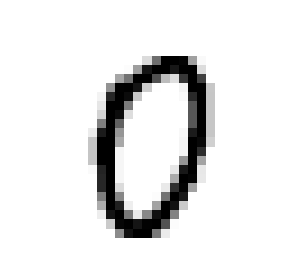

In [194]:
test_digit = X_train[1000]
test_digit_image = test_digit.reshape(28,28)
plt.imshow(test_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")

save_fig("test_digit_plot")
plt.show()

In [195]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    plt.show()

Show images

In [196]:
def plot_digits(instances, images_per_row=20, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    print('length:',len(images),images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")
    

length: 100 10
Saving figure more_digits_plot


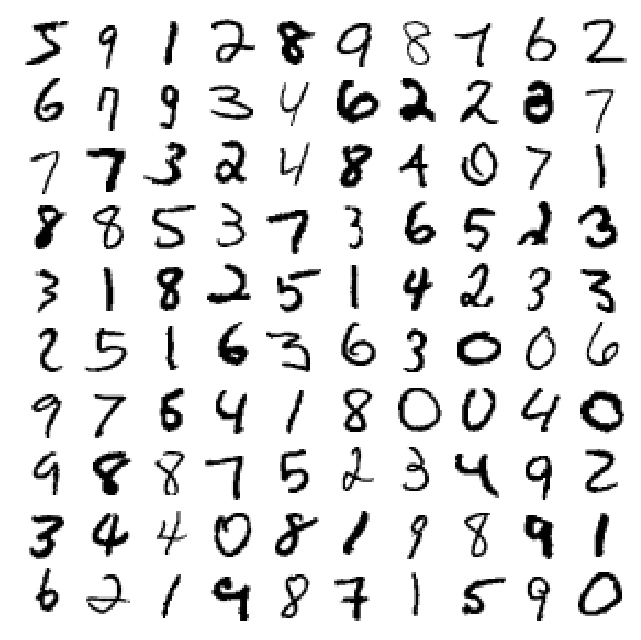

In [197]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [199]:
y[1000]

0

In [200]:
#Convert to the standard format of input. For training data

size = 784
X_train = [data.reshape(size) for data in X_train]

type(X_train)
print(len(X_train))
X_train = np.asarray(X_train)
type(X_train)
X_train.shape

60000


(60000, 784)

In [201]:
size = 784
X_test = [data.reshape(size) for data in X_test]
X_test = np.asarray(X_test)
X_test.shape

(10000, 784)

In [202]:
y_train,y_test =y, y_test
y_train.shape

(60000,)

In [203]:
import numpy as np

shuffle_index = np.random.permutation(60000)

X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

<h4>Binany Classifier POC </h4>

In [240]:
y_train_5 = (y_train == 0)
y_test_5 = (y_test == 0)
print(y_train_5.shape)

(60000,)


In [205]:
from sklearn.linear_model import SGDClassifier

In [210]:
sgd_clf = SGDClassifier(n_iter=10,random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=10, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

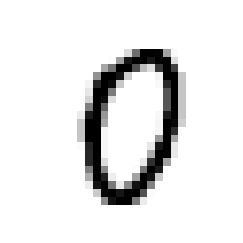

array([ True], dtype=bool)

In [211]:

plot_digit(test_digit)
sgd_clf.predict([test_digit.reshape(28*28)])

In [213]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([ 0.9900005 ,  0.98905   ,  0.98779939])

Testing for the entire training example

In [214]:
sgd_clf = SGDClassifier(n_iter=10,random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=10, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [215]:
sgd_clf.predict([test_digit.reshape(28*28)])

array([0], dtype=uint8)

In [217]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

array([ 0.89562088,  0.8840442 ,  0.88878332])

In [230]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.990000499975
0.98905
0.987799389969


In [233]:
y_pred = sgd_clf.predict(X_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [234]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [237]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53821,   256],
       [  407,  5516]])

In [254]:
y_train_5_true = y_train_5;
confusion_matrix(y_train_5,y_train_5_true)

array([[54077,     0],
       [    0,  5923]])

In [248]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5,y_train_pred)

0.95564795564795568

In [250]:
5516/(5516+256)

0.9556479556479557

In [249]:
recall_score(y_train_5,y_train_pred)

0.93128482188080364

In [251]:
5516/(5516+407)

0.9312848218808036

In [252]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.94330910645575028

In [279]:
y_scores = sgd_clf.decision_function([X_train[1000]])
y_scores

array([[-16.39017555,  -5.65347855,  -5.08544714,   3.62780304,
         -9.31851584,  -3.07900652,  -6.44430932,  -8.47894166,
         -5.79094801,  -7.68550441]])

In [280]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([[False, False, False,  True, False, False, False, False, False,
        False]], dtype=bool)

In [281]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [282]:
y_scores.shape

(60000,)

In [283]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Saving figure precision_recall_vs_threshold_plot


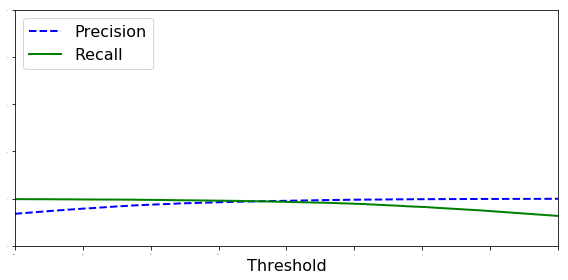

In [285]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 4))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 5])
    plt.xlim([-10, 10])
    save_fig("precision_recall_vs_threshold_plot")
    plt.show()


plot_precision_recall_vs_threshold(precisions, recalls, thresholds)


<h3> ROC Curves </h3>

In [290]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)

In [288]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    

Saving figure roc_curve_plot


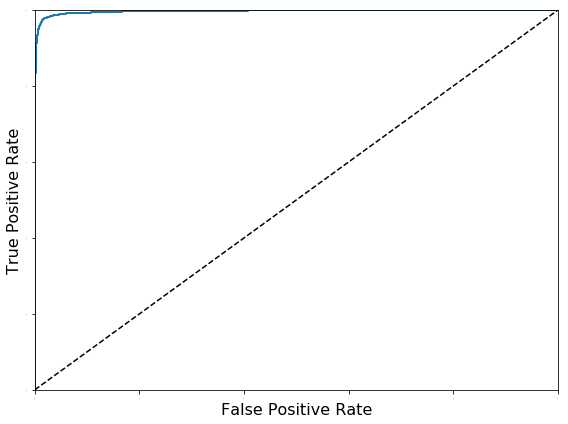

In [289]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()

In [292]:
roc_auc_score(y_train_5,y_scores)

0.99664996109202286

<h3> Using Ensemblers </h3>

In [293]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)

In [303]:
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")
y_probas_forest.shape

(60000, 2)

Saving figure roc_curve_comparison_plot


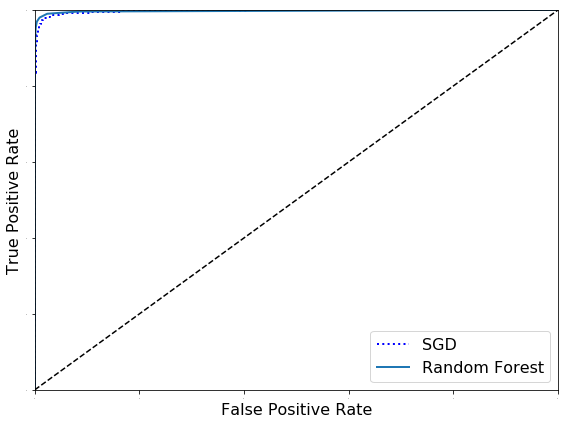

In [301]:
y_scores_forecast = y_probas_forest[:,1]
y_scores_forecast
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forecast)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [305]:
roc_auc_score(y_train_5, y_scores_forecast)

0.99701451370901339

In [310]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.99173405211141064

In [311]:
recall_score(y_train_5, y_train_pred_forest)

0.9317913219652203

In [312]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_train_pred_forest)

Saving figure precision_recall_vs_threshold_plot


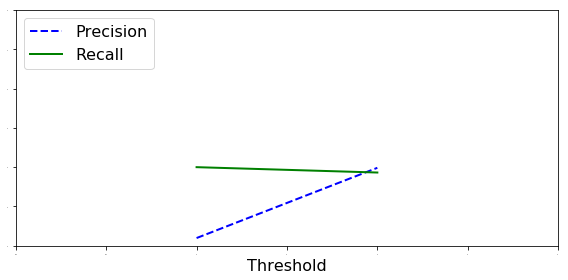

In [317]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 4))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 3])
    plt.xlim([-1, 2])
    save_fig("precision_recall_vs_threshold_plot")
    plt.show()


plot_precision_recall_vs_threshold(precisions, recalls, thresholds)